## Time-series based analysis of Earthquake Risk Factors

### Part 3: Performing EDA on the pickled reddit dataset

In this notebook, I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.

Importing the required libraries:

In [41]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

## for geospatial
import folium
import geopy
## for deep learning
import minisom

## for machine learning
from sklearn import preprocessing, cluster

### Part 2.1: Importing the saved clean data from earthquake

In [42]:
file_path = "../datasets/" + "combined_eq_california" + "_clean" + ".csv"

df_eq = pd.read_csv(file_path)

df_eq.drop(columns = "Unnamed: 0", inplace = True)

df_eq["time"] = pd.to_datetime(df_eq["time"])

#Adding name column
df_eq["name_mag"] = df_eq["mag"].apply(lambda x: "M: " + str(x) + " / ")

df_eq["name_date"] = df_eq["time"].apply(lambda x: " " + str(x.date())+ " / ")

df_eq["name"] = df_eq["name_mag"] + df_eq["name_date"] + df_eq["place"]

df_eq.drop(columns=["name_mag", "name_date"], inplace = True)

df_eq = df_eq.sort_values(by="time")

df_eq.set_index('time', inplace=True)

df_eq.fillna(df_eq.mean(), inplace = True)

file_path = "../datasets/" + "combined_eq_california" + "_timeseries" + ".csv"

df_eq.to_csv(file_path)

df_eq.head(5)

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name
time,,,,,,,,,,,,,,,,,
1970-01-02 10:45:20.570,91,earthquake,3.14,"24km S of Santa Barbara, CA",reviewed,0,152,ci,11.000000,0.234700,0.590000,205.000000,ml,-119.695667,34.206000,6.000000,M: 3.14 / 1970-01-02 / 24km S of Santa Barbar...
1970-01-02 21:47:53.740,90,earthquake,2.61,"12km NE of Inyokern, CA",reviewed,0,105,ci,6.000000,0.136800,0.730000,96.000000,ml,-117.733667,35.735167,1.650000,"M: 2.61 / 1970-01-02 / 12km NE of Inyokern, CA"
1970-01-03 02:51:58.400,89,earthquake,4.00,"San Francisco Bay area, California",reviewed,0,246,ushis,20.500989,0.198006,0.197771,121.016289,mb,-122.088000,37.298000,6.274206,"M: 4.0 / 1970-01-03 / San Francisco Bay area,..."
1970-01-03 19:48:40.840,88,earthquake,3.16,"6km NE of Banning, CA",reviewed,0,154,ci,9.000000,0.454000,0.530000,103.000000,ml,-116.830500,33.960500,6.000000,"M: 3.16 / 1970-01-03 / 6km NE of Banning, CA"
1970-01-04 02:27:15.700,87,earthquake,2.74,"8km N of Big Bear City, CA",reviewed,0,116,ci,9.000000,0.556500,0.560000,120.000000,ml,-116.843333,34.333500,6.000000,M: 2.74 / 1970-01-04 / 8km N of Big Bear City...


In [43]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313342 entries, 1970-01-02 10:45:20.570000 to 2020-10-01 15:28:09.630000
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      313342 non-null  int64  
 1   type       313342 non-null  object 
 2   mag        313342 non-null  float64
 3   place      313342 non-null  object 
 4   status     313342 non-null  object 
 5   tsunami    313342 non-null  int64  
 6   sig        313342 non-null  int64  
 7   net        313342 non-null  object 
 8   nst        313342 non-null  float64
 9   dmin       313342 non-null  float64
 10  rms        313342 non-null  float64
 11  gap        313342 non-null  float64
 12  magType    313339 non-null  object 
 13  longitude  313342 non-null  float64
 14  latitude   313342 non-null  float64
 15  depth      313342 non-null  float64
 16  name       313342 non-null  object 
dtypes: float64(8), int64(3), object(6)
memory usage: 43.0+ MB

Text(0, 0.5, 'Magnitude')

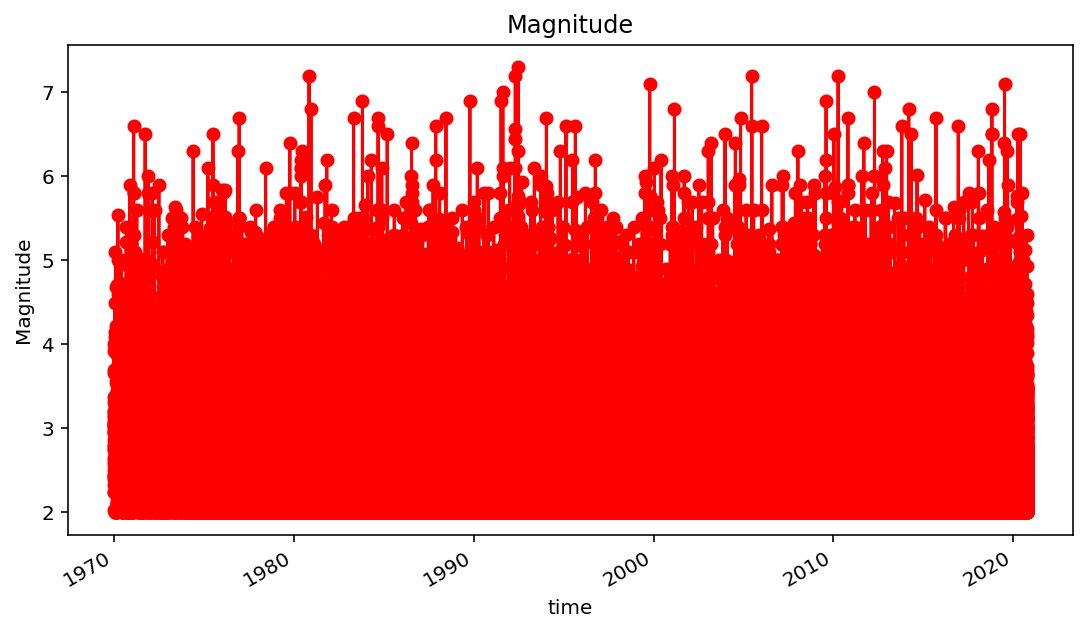

In [44]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.ylabel("Magnitude")

## How many large earthquakes (M>6) happened in last 50 years?

In [45]:
df_eq_large = df_eq[df_eq["mag"]>6].copy()

df_eq_large.head(5)

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name
time,,,,,,,,,,,,,,,,,
1971-02-09 14:00:41.920,305,earthquake,6.6,"10km SSW of Agua Dulce, CA",reviewed,0,1560,ci,0.000000,0.198006,0.249000,123.400000,mw,-118.370,34.416,8.95,"M: 6.6 / 1971-02-09 / 10km SSW of Agua Dulce, CA"
1971-09-30 08:18:00.000,181,earthquake,6.5,Gulf of California,automatic,0,650,iscgem,20.500989,0.198006,0.197771,121.016289,mw,-110.834,26.816,15.00,M: 6.5 / 1971-09-30 / Gulf of California
1974-05-31 14:04:59.900,0,earthquake,6.3,Gulf of California,reviewed,0,611,us,20.500989,0.198006,0.197771,121.016289,ms,-111.238,27.226,33.00,M: 6.3 / 1974-05-31 / Gulf of California
1975-03-28 02:31:05.700,626,earthquake,6.1,southern Idaho,reviewed,0,572,us,20.500989,0.198006,0.197771,121.016289,mb,-112.548,42.061,5.00,M: 6.1 / 1975-03-28 / southern Idaho
1975-07-08 09:37:27.300,1042,earthquake,6.5,"Baja California, Mexico",reviewed,0,650,us,20.500989,0.198006,0.197771,121.016289,ms,-113.346,29.459,33.00,"M: 6.5 / 1975-07-08 / Baja California, Mexico"


In [46]:
len(df_eq_large)

85

Text(0, 0.5, 'Magnitude')

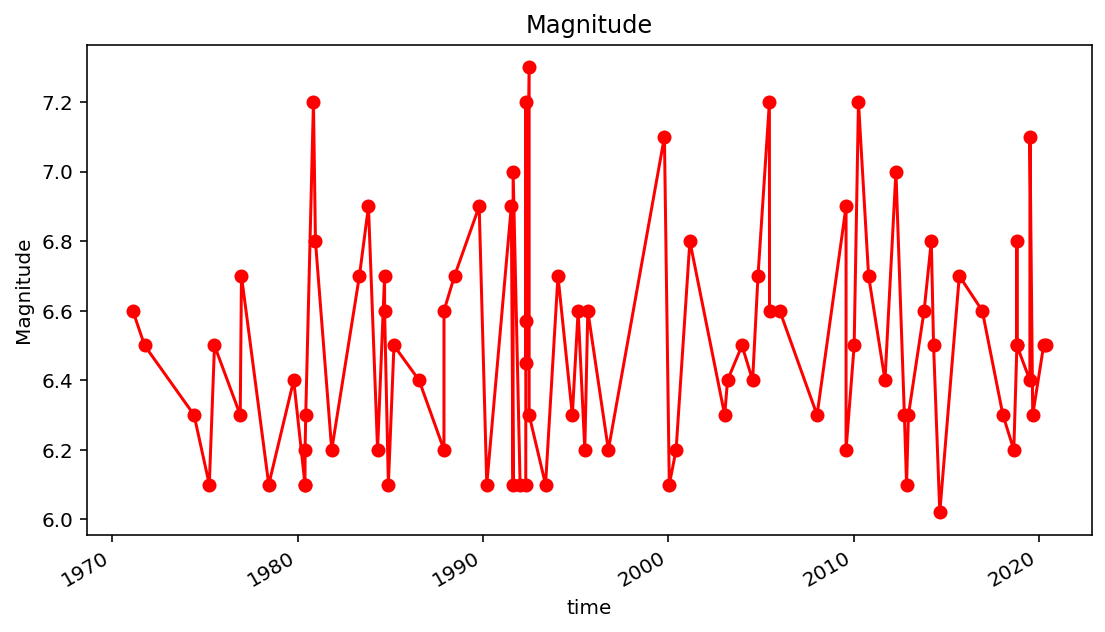

In [47]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_large["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.ylabel("Magnitude")

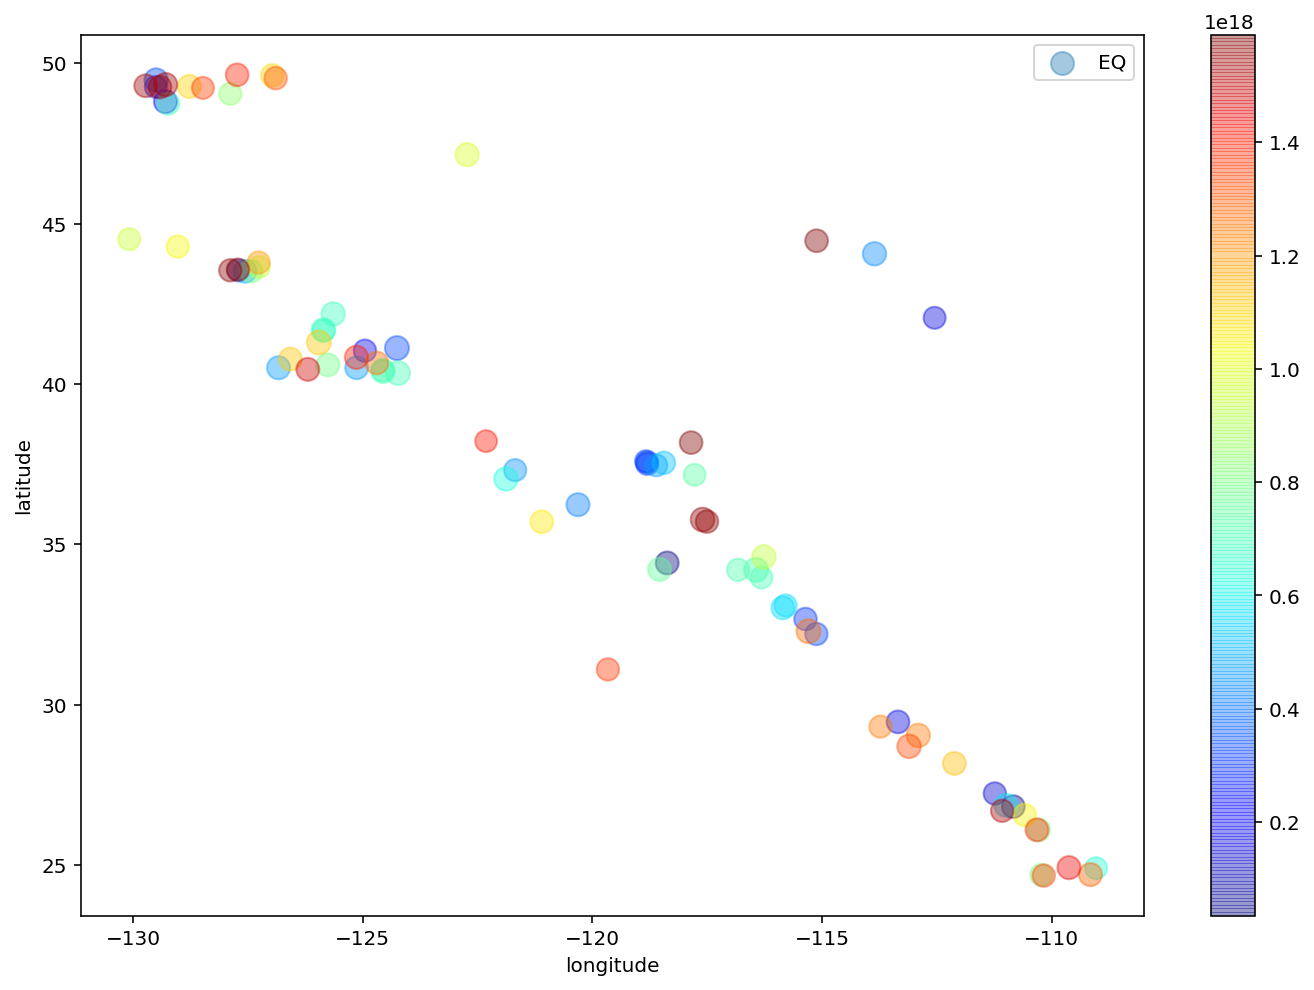

In [48]:
ax = plt.gca()

df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_large['mag']/0.05, label="EQ",
    c=df_eq_large.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.savefig("../plots/EDA_long_lat.png")


plt.tight_layout()

In [49]:
# Source: https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

city = "California"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_large.copy()

## create color column
lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)




## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

California, United States of America
[lat, long]: [36.7014631, -118.7559974]


## What happened 30 days ahead of 1989 Loma Prieta earthquake ?

In [50]:
df_eq_loma_prieta = df_eq['1989-09-19':'1989-10-19']

df_eq_loma_prieta.head()

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name
time,,,,,,,,,,,,,,,,,
1989-09-19 02:49:47.290,2429,earthquake,2.30,"17km E of Desert Hot Springs, CA",reviewed,0,81,ci,0.000000,0.198006,0.054,70.000000,mc,-116.316,33.971,7.935,M: 2.3 / 1989-09-19 / 17km E of Desert Hot Sp...
1989-09-19 03:03:33.230,2428,earthquake,2.79,"12km ESE of Anza, CA",reviewed,0,120,ci,0.000000,0.198006,0.109,39.800000,ml,-116.557,33.517,12.388,"M: 2.79 / 1989-09-19 / 12km ESE of Anza, CA"
1989-09-19 09:46:00.790,2427,earthquake,3.70,Arizona,reviewed,0,211,us,20.500989,0.198006,0.700,121.016289,ml,-112.407,36.663,5.000,M: 3.7 / 1989-09-19 / Arizona
1989-09-19 16:29:32.540,2426,earthquake,2.25,"15km S of Las Flores, CA",reviewed,0,78,ci,0.000000,0.198006,0.132,126.900000,mc,-118.616,33.902,11.117,"M: 2.25 / 1989-09-19 / 15km S of Las Flores, CA"
1989-09-19 17:46:55.920,2425,earthquake,2.61,"48km ENE of San Clemente Is. (SE tip), CA",reviewed,0,105,ci,0.000000,0.198006,0.241,199.700000,mc,-117.909,33.040,5.633,M: 2.61 / 1989-09-19 / 48km ENE of San Clemen...


In [51]:
# Source: https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

city = "California"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_loma_prieta.copy()

## create color column
lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)




## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

California, United States of America
[lat, long]: [36.7014631, -118.7559974]


Text(0, 0.5, 'Magnitude')

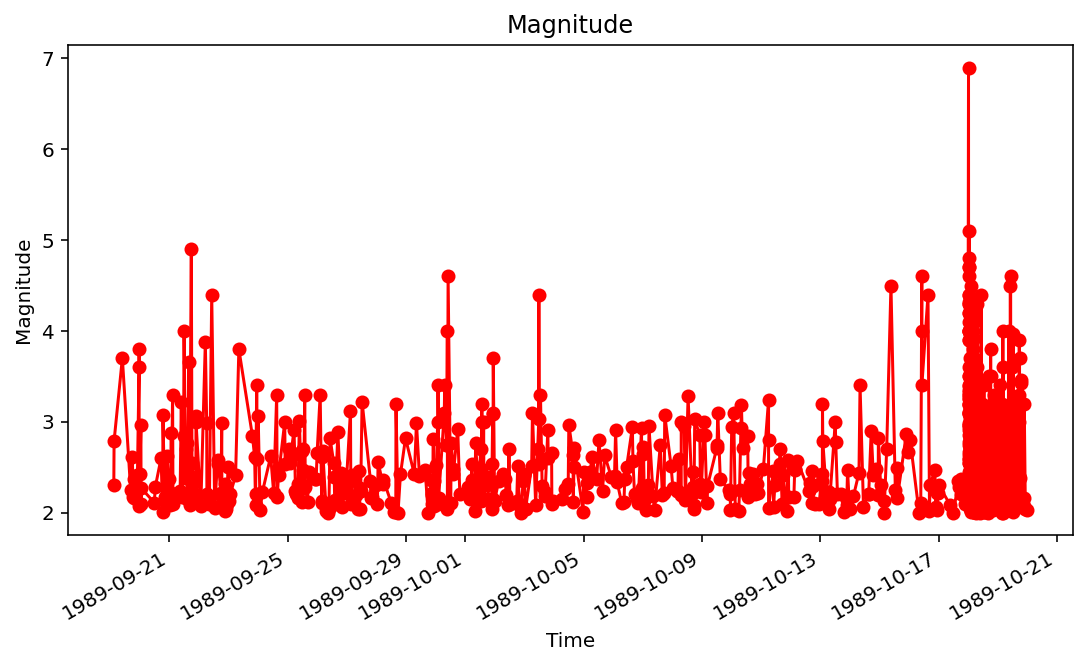

In [52]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_loma_prieta["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.xlabel('Time')
plt.ylabel("Magnitude")

Figure suggests that the main shock, which had magnitude of 7 was just a spike in magnitude domain!

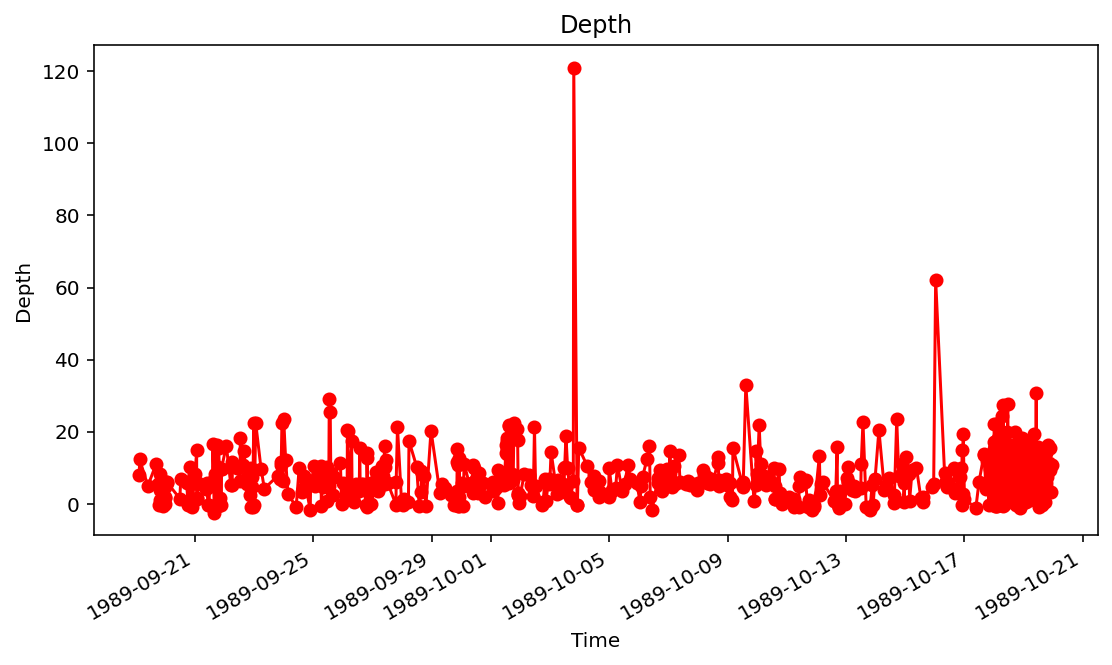

In [53]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_loma_prieta["depth"].plot(style="ro-")

plt.title("Depth")
plt.xlabel('Time')
plt.ylabel("Depth");

Same goes for depth!

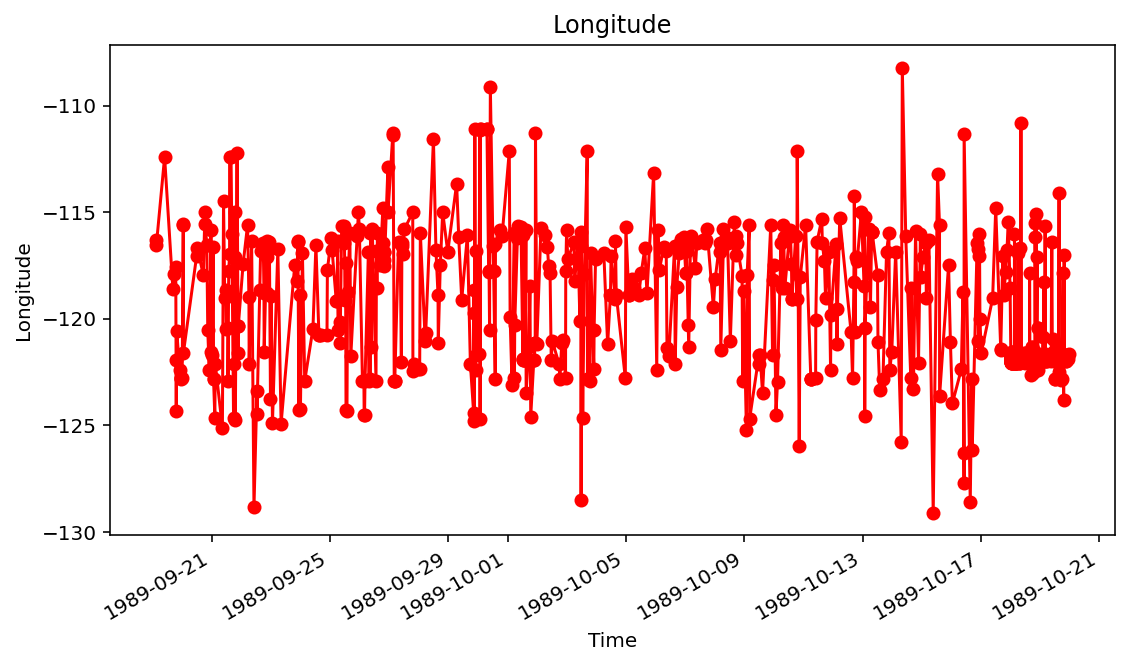

In [54]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_loma_prieta["longitude"].plot(style="ro-")

plt.title("Longitude")
plt.xlabel('Time')
plt.ylabel("Longitude");

Same goes for Longitude!

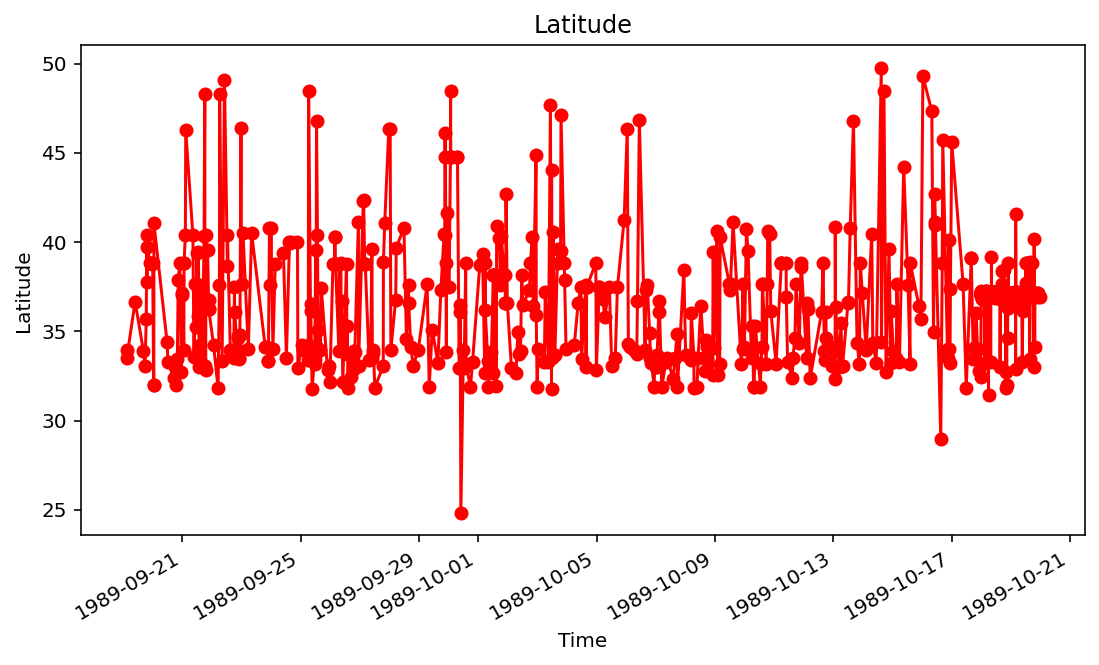

In [55]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_loma_prieta["latitude"].plot(style="ro-")

plt.title("Latitude")
plt.xlabel('Time')
plt.ylabel("Latitude");

Same goes for depth!

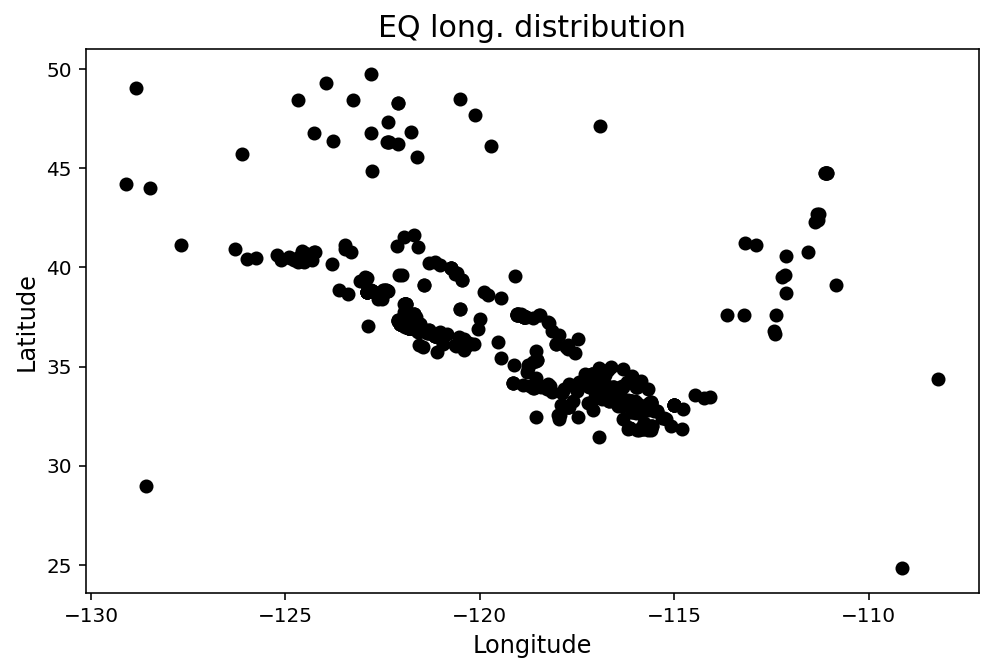

In [56]:
plt.figure(figsize = [8, 5])

plt.scatter(df_eq_loma_prieta["longitude"], df_eq_loma_prieta["latitude"], color="black");

# Format title and axis labels
plt.title("EQ long. distribution", fontsize = 15);

plt.xlabel("Longitude", fontsize = 12);
plt.ylabel("Latitude", fontsize = 12);

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

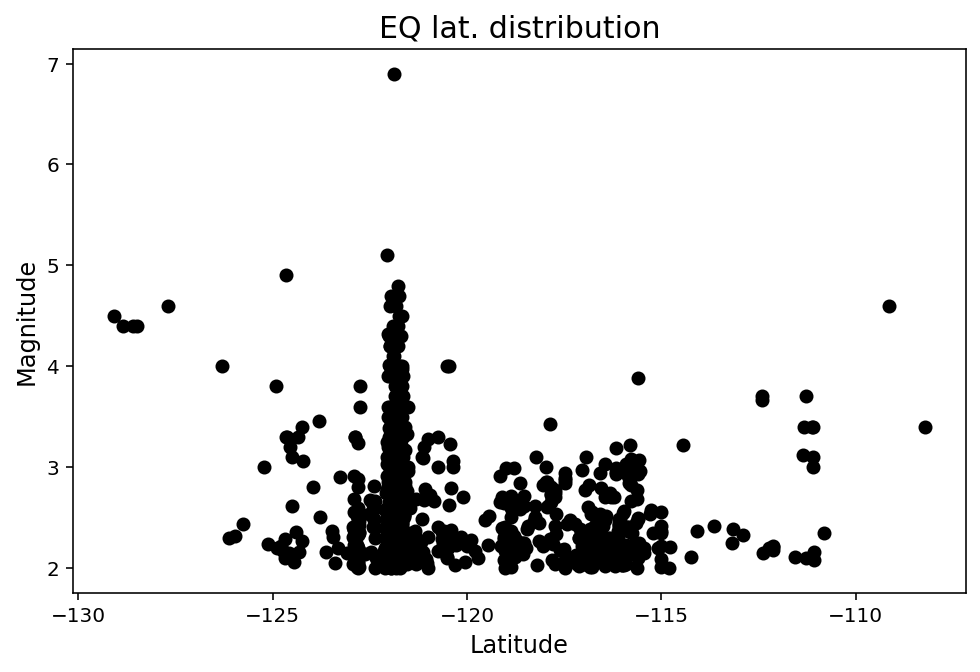

In [57]:
plt.figure(figsize = [8, 5])

plt.scatter(df_eq_loma_prieta["longitude"], df_eq_loma_prieta["mag"], color="black");

# Format title and axis labels
plt.title("EQ lat. distribution", fontsize = 15);

plt.xlabel("Latitude", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

### Now, looking at tempral earthquake focus points

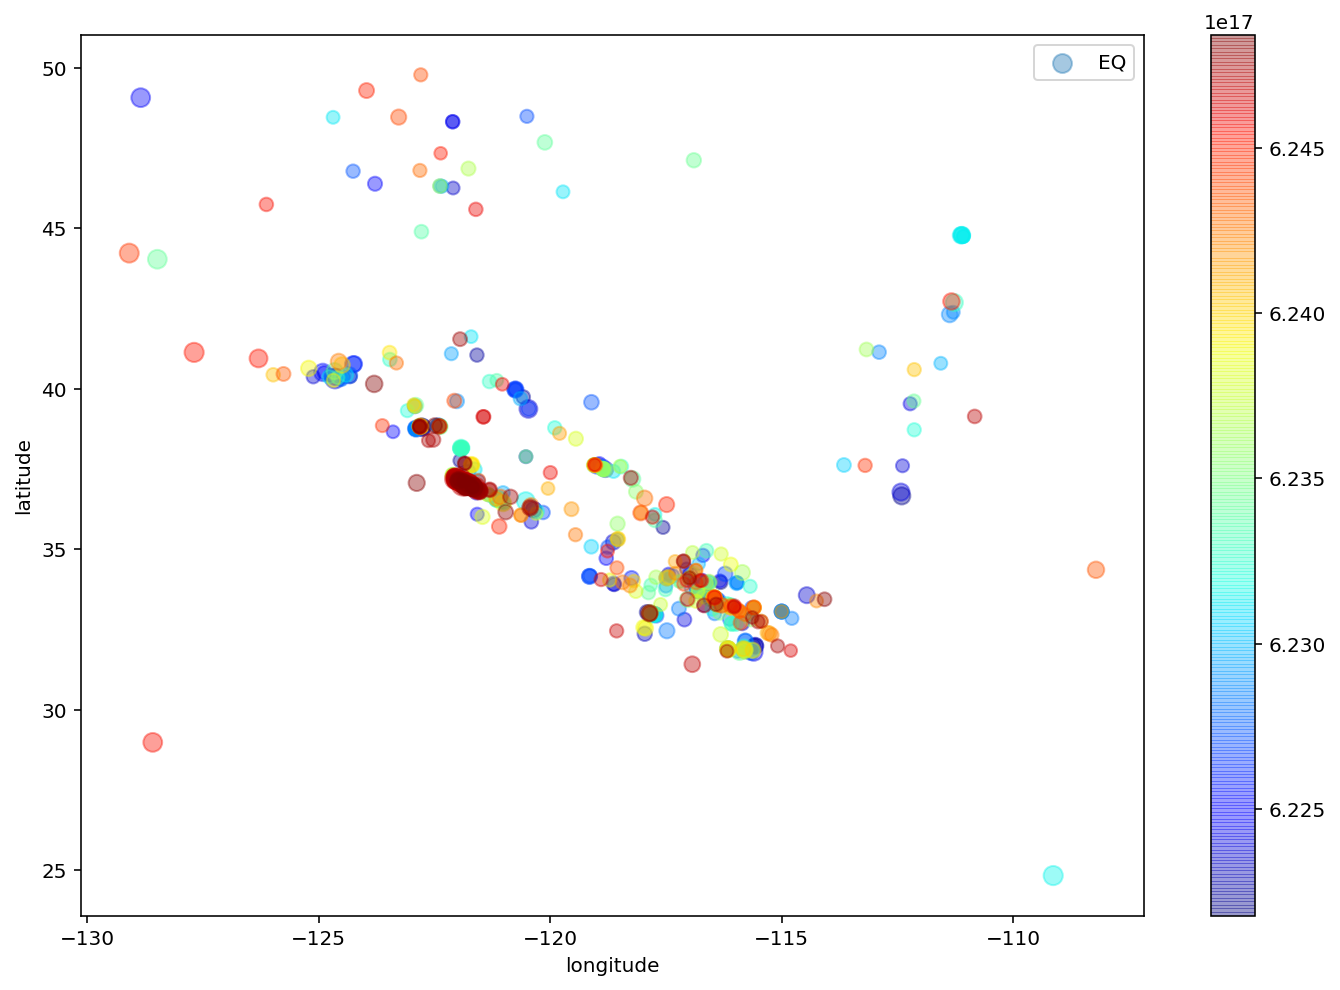

In [58]:
ax = plt.gca()

df_eq_loma_prieta.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_loma_prieta['mag']/0.05, label="EQ",
    c=df_eq_loma_prieta.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.savefig("../plots/EDA_long_lat.png")


plt.tight_layout()

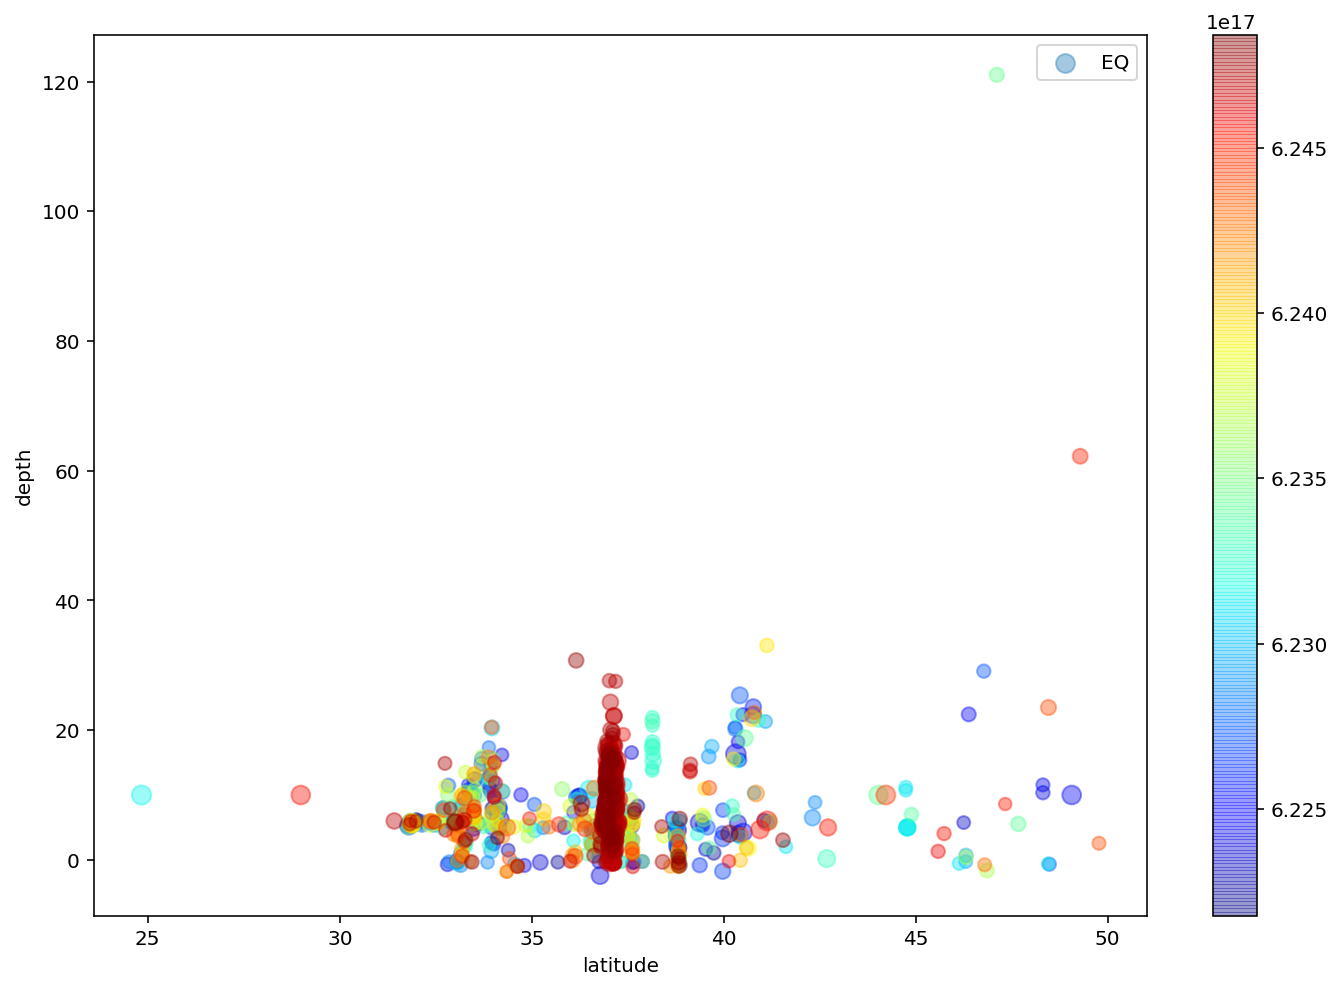

In [59]:
ax = plt.gca()

df_eq_loma_prieta.plot(kind="scatter", x="latitude", y="depth",
    s=df_eq_loma_prieta['mag']/0.05, label="EQ",
    c=df_eq_loma_prieta.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.savefig("../plots/EDA_depth_lat.png")


plt.tight_layout()

### What happens to EQ cycle every one hour ?

Text(0, 0.5, 'Magnitude')

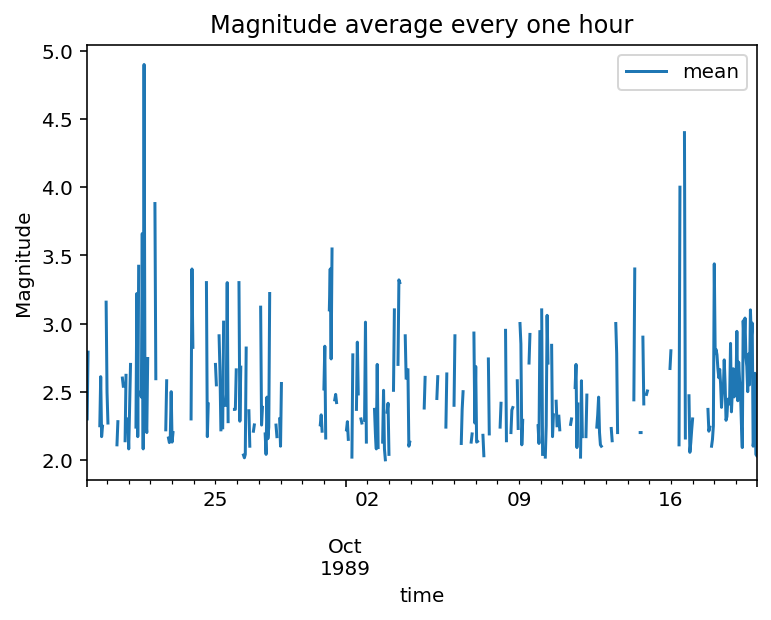

In [60]:
df_eq_loma_prieta["mag"].resample("1H").apply([np.mean]).plot()
plt.title("Magnitude average every one hour")
plt.ylabel("Magnitude")

Text(0.5, 0, 'Depth/Km')

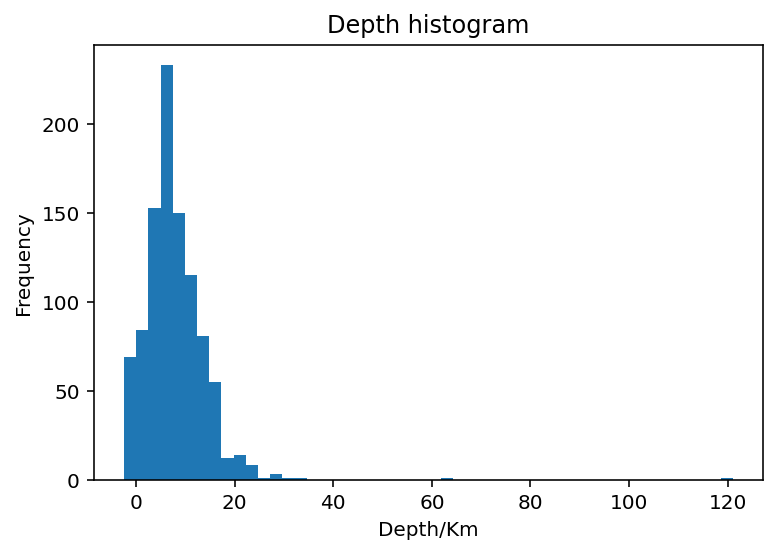

In [61]:
plt.figure()

depth = df_eq_loma_prieta["depth"]
depth.plot(kind="hist", stacked=True, bins=50)

plt.title("Depth histogram")
plt.xlabel("Depth/Km")

Text(0.5, 0, 'Magnitude')

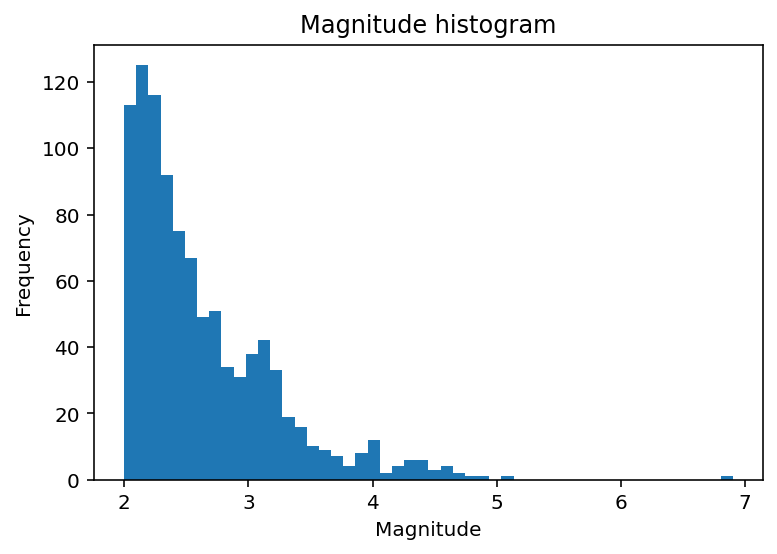

In [62]:
plt.figure()

depth = df_eq_loma_prieta["mag"]
depth.plot(kind="hist", stacked=True, bins=50)

plt.title("Magnitude histogram")
plt.xlabel("Magnitude")

In [63]:
print("Hello World!")

Hello World!
